In [23]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3
%matplotlib inline

In [24]:
# === 確率密度 ===
# 勉強のため便利関数を使わずにコードで書いていきます

# 円周率
pi = sp.pi

# e (自然対数の底)
e = sp.exp(1)

# 確率変数、平均、標準偏差のセット
x = 3
mu = 4
sigma = 0.8

In [25]:
# 確率密度の計算コード
1 / (sp.sqrt(2 * sp.pi * sigma ** 2)) * sp.exp(- ((x - mu)**2) / (2 * sigma**2))

0.228

In [26]:
# 便利関数を使うと
stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.228

In [27]:
# 正規分布のインスタンスを生成してからでも結果は同じです
norm_dist = stats.norm(loc = 4, scale = 0.8)
norm_dist.pdf(x = 3)

0.228

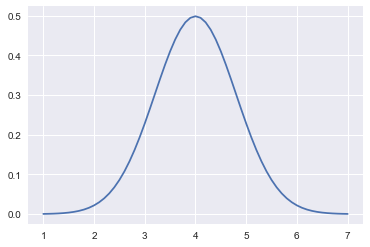

In [28]:
# 確率密度を図示
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(x_plot,
                stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8))

In [29]:
# === 標本がある値以下になる確率 ===

# この場合「ある値いかになったデータの個数　/ サンプルサイズ」を計算すれば良いですね
# まずは母集団分布が　N(x | 4, 0.8**2) である母集団からの標本抽出シミュレーションを実行します（サンプルサイズ=100000）

np.random.seed(1)
simulated_sample = stats.norm.rvs(loc = 4, scale = 0.8, size = 100000)
simulated_sample 

array([ 5.299,  3.511,  3.577, ...,  4.065,  4.275,  3.402])

In [30]:
# ３以下となるデータの個数は以下のように取れます
sp.sum(simulated_sample <= 3)

10371

In [35]:
# サンプルサイズで割ります。およそ１０％となりました。
sp.sum(simulated_sample <= 3) / len(simulated_sample) # 母数がsp.sum(simulated_sample)でないことに注意

0.104

In [38]:
# === 累積分布関数 ===
# 平たく言うと「ある値以下となる確率を計算してくれる」確率を計算してくれるものです。
# これを使うと、上でやったようにわざわざ数え上げる必要はありません

stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.106

In [41]:
# 正規分布なので平均値以下は５０％になる
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

# データを数え上げることなく積分計算により確率を簡単に計算することができるのが「母集団分布に正規分布を仮定した」ことのメリットです

0.500

In [43]:
# === パーセント点 ===

# パーセント点とは「ある確率になる基準値」のことを指します

#母集団分布が N( x | 4, 0.8**2 ) であるときに「下側確率が２．５％」となるパーセント点を求めます
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.432

In [44]:
# 下側確率とパーセント点の関係から、以下の関係が成り立ちます
sitagawa = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
stats.norm.ppf(loc = 4, scale = 0.8, q = sitagawa)

3.000

In [45]:
np.random.seed(1)

# y値を格納する入れ物
t_value_array = np.zeros(10000)

# 正規分布クラスのインスタンス
norm_dist = stats.norm(loc = 4, scale = 0.8)

# シミュレーションの実行
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se
    

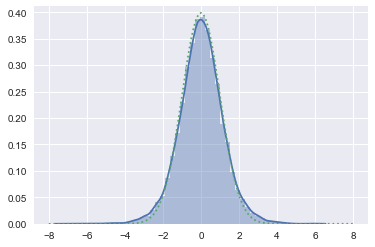

In [46]:
# t値のヒストグラム
sns.distplot(t_value_array)
# 標準正規分布の確率密度
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x), linestyle = 'dotted')

In [57]:
sp.mean(stats.norm.rvs(4, 0.8, 10))

3.751

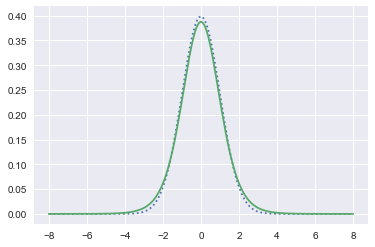

In [58]:
# === t分布 ===
# t分布の確率密度と標準正規分布の確率密度の図示
plt.plot(x, stats.norm.pdf(x = x), linestyle = 'dotted')
plt.plot(x, stats.t.pdf(x = x, df = 9))

# 実線で示したt分布の方がやや裾が広がっていることが分かります。
# つまり平均値と大きく異なるデータが発生しやすいわけです

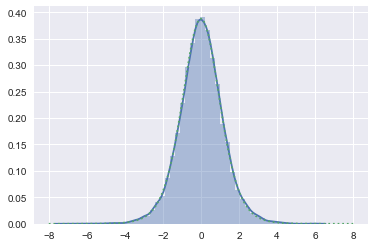

In [59]:
sns.distplot(t_value_array, norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df = 9), linestyle = 'dotted')